<a href="https://colab.research.google.com/github/Sulbae/Latihan-Membangun-Sistem-Machine-Learning/blob/main/Template_Eksperimen_MSML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [47]:
import mlflow
import dagshub
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, IsolationForest

from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

# **Memuat Preprocessed Data**

## Classifier Data

In [6]:
clf_train = pd.read_csv('../preprocessing/clf_train_preprocessed.csv')
clf_test = pd.read_csv('../preprocessing/clf_test.csv')

In [7]:
clf_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505288,0.371295,0.048040,-0.791809,2.052308,0.925183,0.565242,-0.365393,-0.177457,0
1,-0.709433,0.935084,-1.016080,0.850917,1.617777,-1.501693,-2.169448,-1.581404,-0.486502,1
2,0.929048,0.980710,0.808192,-0.585714,-0.019216,-0.818137,0.085404,-0.351573,0.547202,0
3,-0.227728,0.671248,-0.001853,0.030738,-0.019216,-0.677955,0.774861,0.501623,-0.091554,0
4,-0.390242,0.176673,-0.548156,-0.571875,-0.196177,0.665479,0.686438,-1.263826,-0.544746,0


In [8]:
clf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2620 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          2620 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2620 non-null   float64
 8   Turbidity        2620 non-null   float64
 9   Potability       2620 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 204.8 KB


In [9]:
clf_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.030569,-0.238336,-0.325470,-0.676788,-0.019216,-0.492411,0.265884,0.781086,-1.602336,1
1,-0.617506,-0.267650,-1.300395,0.379131,-0.310487,0.484065,2.112074,0.126600,0.200210,0
2,-0.030569,-0.617017,0.469844,0.433350,0.680667,-1.134013,0.053165,1.523568,0.559978,0
3,-0.483725,1.189652,1.435043,1.284983,-1.060448,-0.871123,-1.535066,-0.435916,-2.176229,0
4,-0.639037,0.041532,0.548021,0.294471,-0.125254,1.484732,0.474402,-1.576772,1.776070,0


In [10]:
clf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               656 non-null    float64
 1   Hardness         656 non-null    float64
 2   Solids           656 non-null    float64
 3   Chloramines      656 non-null    float64
 4   Sulfate          656 non-null    float64
 5   Conductivity     656 non-null    float64
 6   Organic_carbon   656 non-null    float64
 7   Trihalomethanes  656 non-null    float64
 8   Turbidity        656 non-null    float64
 9   Potability       656 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 51.4 KB


## Anomali Detection Data

In [11]:
anom_train = pd.read_csv('../preprocessing/anom_train_preprocessed.csv')
anom_test = pd.read_csv('../preprocessing/anom_test.csv')

In [12]:
anom_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1022 non-null   float64
 1   Hardness         1022 non-null   float64
 2   Solids           1022 non-null   float64
 3   Chloramines      1022 non-null   float64
 4   Sulfate          1022 non-null   float64
 5   Conductivity     1022 non-null   float64
 6   Organic_carbon   1022 non-null   float64
 7   Trihalomethanes  1022 non-null   float64
 8   Turbidity        1022 non-null   float64
dtypes: float64(9)
memory usage: 72.0 KB


In [13]:
anom_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               256 non-null    float64
 1   Hardness         256 non-null    float64
 2   Solids           256 non-null    float64
 3   Chloramines      256 non-null    float64
 4   Sulfate          256 non-null    float64
 5   Conductivity     256 non-null    float64
 6   Organic_carbon   256 non-null    float64
 7   Trihalomethanes  256 non-null    float64
 8   Turbidity        256 non-null    float64
dtypes: float64(9)
memory usage: 18.1 KB


In [15]:
anom_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.211351,1.540607,0.258843,-2.845023,0.621786,-1.063448,0.358997,-0.430967,-0.762550
1,0.108714,0.293964,0.400579,0.367225,-0.292111,0.734264,0.426498,-1.107803,0.992374
2,-0.438034,0.020508,0.394420,-2.793599,2.537426,-0.903169,0.845156,-2.113182,0.678430
3,1.835686,-0.791147,2.008207,0.697263,-0.007195,-0.873142,-0.009850,2.227785,0.423978
4,-0.022690,-1.157349,0.879596,-0.822117,-2.004270,-1.403435,-0.091644,0.664409,0.183510


In [14]:
anom_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-1.328158,-0.790110,1.413879,-1.877733,1.089636,-1.356788,-1.169820,0.231120,0.130390
1,-0.022690,-0.024595,-0.549325,-0.083891,-0.098089,-0.515790,-0.947103,1.498362,-0.163718
2,-0.224032,-0.338321,-1.466611,0.492487,0.296310,-1.293561,-0.661784,-0.652854,-0.011377
3,-0.244845,0.322957,-0.564625,0.315674,-0.707032,-1.187626,0.625793,-2.373785,-0.678329
4,-0.158952,0.662451,0.598594,-0.523584,0.194042,1.294310,1.640061,0.104693,-1.185575


# Modelling

## Classifier Model

In [22]:
clf_X_train = clf_train.drop('Potability', axis=1)
clf_y_train = clf_train['Potability']

clf_X_test = clf_test.drop('Potability', axis=1)
clf_y_test = clf_test['Potability']

In [56]:
# Model Random Forest Classifier
model_clf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
)

In [57]:
N_ESTIMATORS_RANGE = np.linspace(10, 100, 3, dtype=int)
MAX_DEPTH_RANGE = np.linspace(1, 50, 3, dtype=int)
MIN_SAMPLES_LEAF = np.linspace(1, 10, 3, dtype=int)
MIN_SAMPLES_SPLIT = np.linspace(2, 10, 3, dtype=int)

In [58]:
param_grid = {
    'n_estimators': N_ESTIMATORS_RANGE,   
    'max_depth': MAX_DEPTH_RANGE,
    'min_samples_leaf': MIN_SAMPLES_LEAF,
    'min_samples_split': MIN_SAMPLES_SPLIT
}

In [59]:
grid_search = GridSearchCV(
    estimator=model_clf,
    param_grid=param_grid,
    cv=3,                 
    scoring = {
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    },
    refit = 'precision',
    n_jobs=-1,
    verbose=2
)

In [60]:
grid_search.fit(clf_X_train, clf_y_train)

best_model = grid_search.best_estimator_

grid_search.cv_results_['mean_test_precision']
grid_search.cv_results_['mean_test_recall']
grid_search.cv_results_['mean_test_f1']

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.6296893811562473


In [103]:
y_prob = best_model.predict_proba(clf_X_test)[:,1]
y_pred = (y_prob >= 0.69).astype(int) # Threshold klasifikasi

In [104]:
# Evaluasi model
precision = precision_score(clf_y_test, y_pred)
recall = recall_score(clf_y_test, y_pred)
f1 = f1_score(clf_y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 1.0
Recall: 0.0546875
F1 Score: 0.1037037037037037


In [105]:
# Feature Importance
# feature_importance = grid_search.best_estimator_.feature_importances_
# print("Feature Importances:", feature_importance)

In [106]:
# Classification report
print(classification_report(clf_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       400
           1       1.00      0.05      0.10       256

    accuracy                           0.63       656
   macro avg       0.81      0.53      0.44       656
weighted avg       0.77      0.63      0.51       656



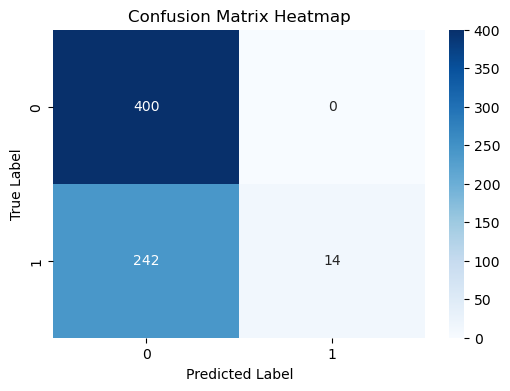

In [107]:
# Confusion matrix
conf_matrix = confusion_matrix(clf_y_test, y_pred)

# heatmap 
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Anomali Detection Model

In [ ]:
# Model Isolation Forest
model_if = IsolationForest(
    n_estimators=100,
    contamination=0.1,
    random_state=42
)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': ['auto', 0.6, 0.8],
    'max_features': [0.6, 0.8, 1.0]
}

In [ ]:
grid_search_anom = GridSearchCV(
    estimator=model_if,
    param_grid=param_grid,
    scoring='f1',        
    cv=3,
    n_jobs=-1,
    verbose=2
)

In [ ]:
grid_search_anom.fit(anom_train)
best_anom_model = grid_search_anom.best_estimator_

In [ ]:
y_pred_anom = best_anom_model.predict(anom_test)

y_true = (anom_test == 0).astype(int)

print(classification_report(y_true, y_pred_anom))

conf_matrix = confusion_matrix(clf_y_test, y_pred)
# heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Inference